In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore


In [2]:
data = pd.read_excel('Election_data.xlsx','Election_Dataset_Two Classes')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [4]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
data = data.drop(columns=['Unnamed: 0'])

In [6]:
data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [7]:
data.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [8]:
data = data[data.duplicated(keep = 'first') == False]

In [9]:
data.shape

(1517, 9)

In [10]:
data.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


<AxesSubplot:xlabel='age', ylabel='Count'>

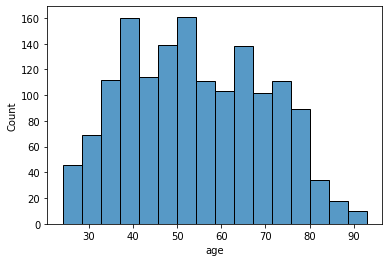

In [12]:
sns.histplot(data.age)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

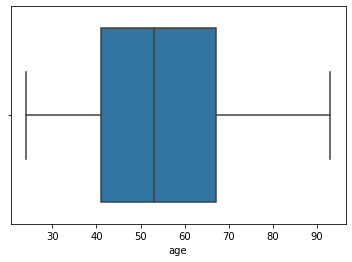

In [13]:
sns.boxplot(data.age)

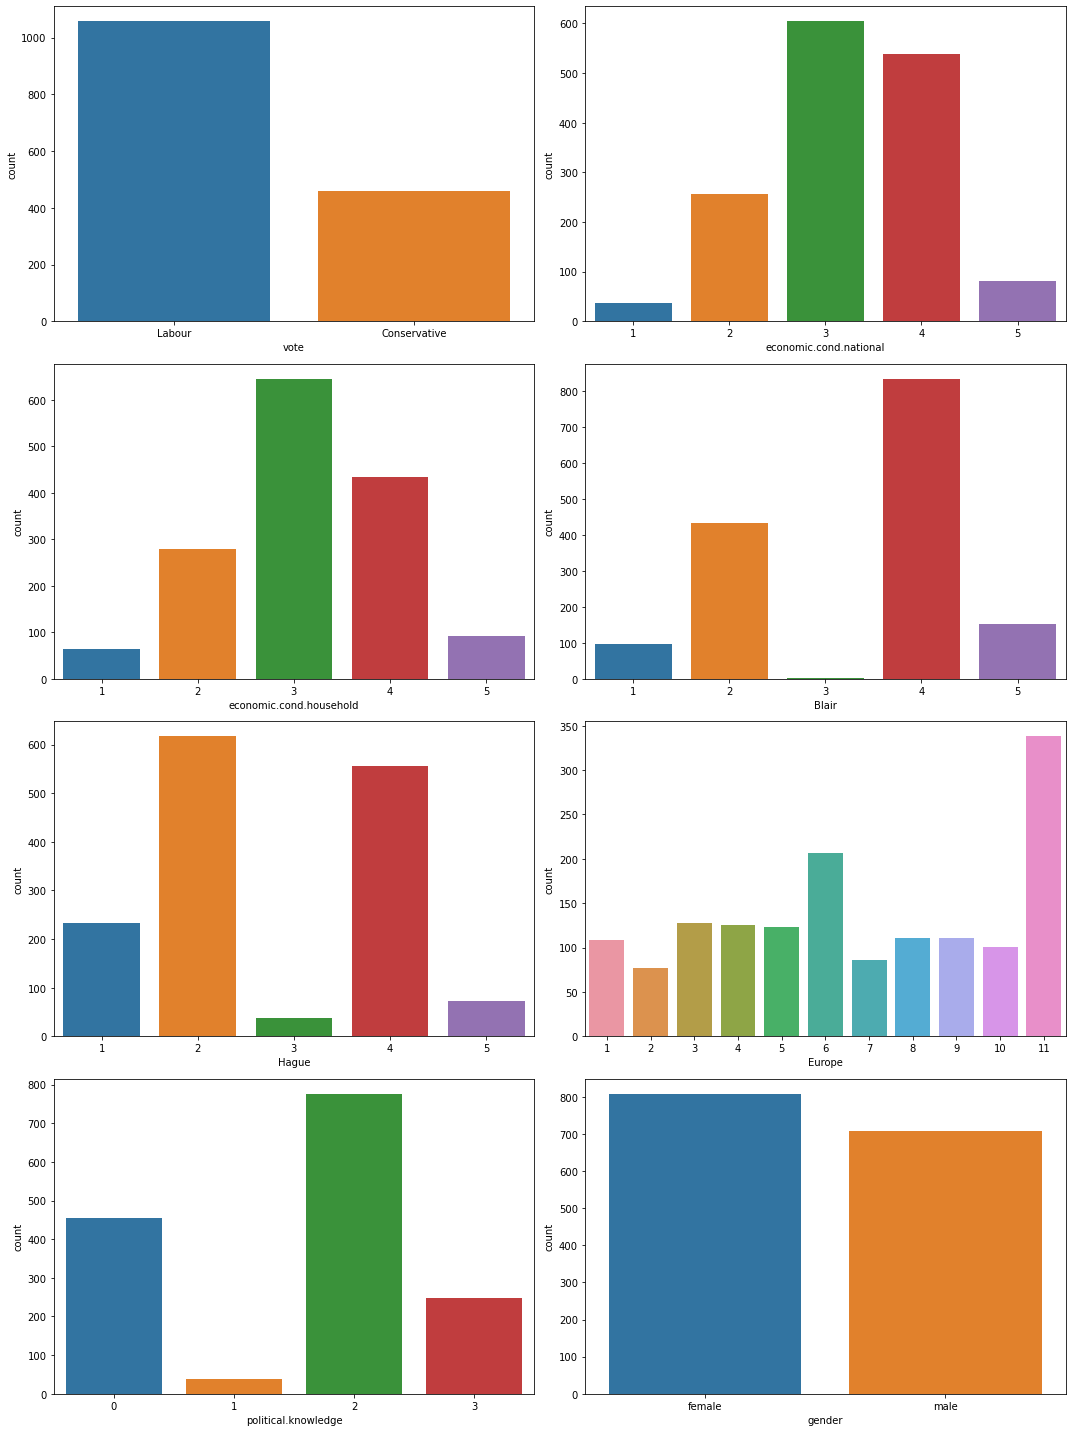

In [14]:
fig,ax = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)


sns.countplot(x=data['vote'], ax=ax[0][0])
sns.countplot(x=data['economic.cond.national'], ax=ax[0][1])
sns.countplot(x=data['economic.cond.household'], ax=ax[1][0])
sns.countplot(x=data['Blair'], ax=ax[1][1])
sns.countplot(x=data['Hague'], ax=ax[2][0])
sns.countplot(x=data['Europe'], ax=ax[2][1])
sns.countplot(x=data['political.knowledge'], ax=ax[3][0])
sns.countplot(x=data['gender'], ax=ax[3][1])
plt.tight_layout()
plt.show()

<AxesSubplot:>

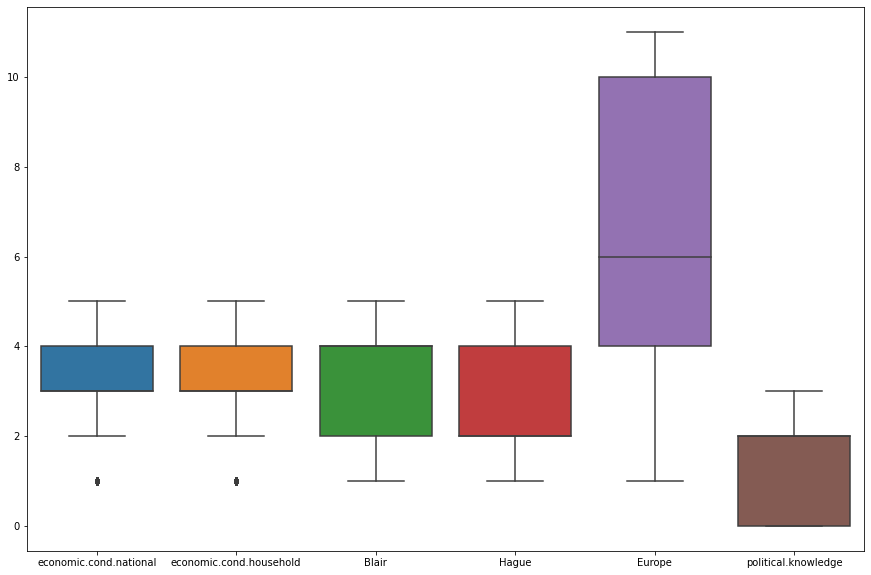

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(data = data.iloc[:,2:8])

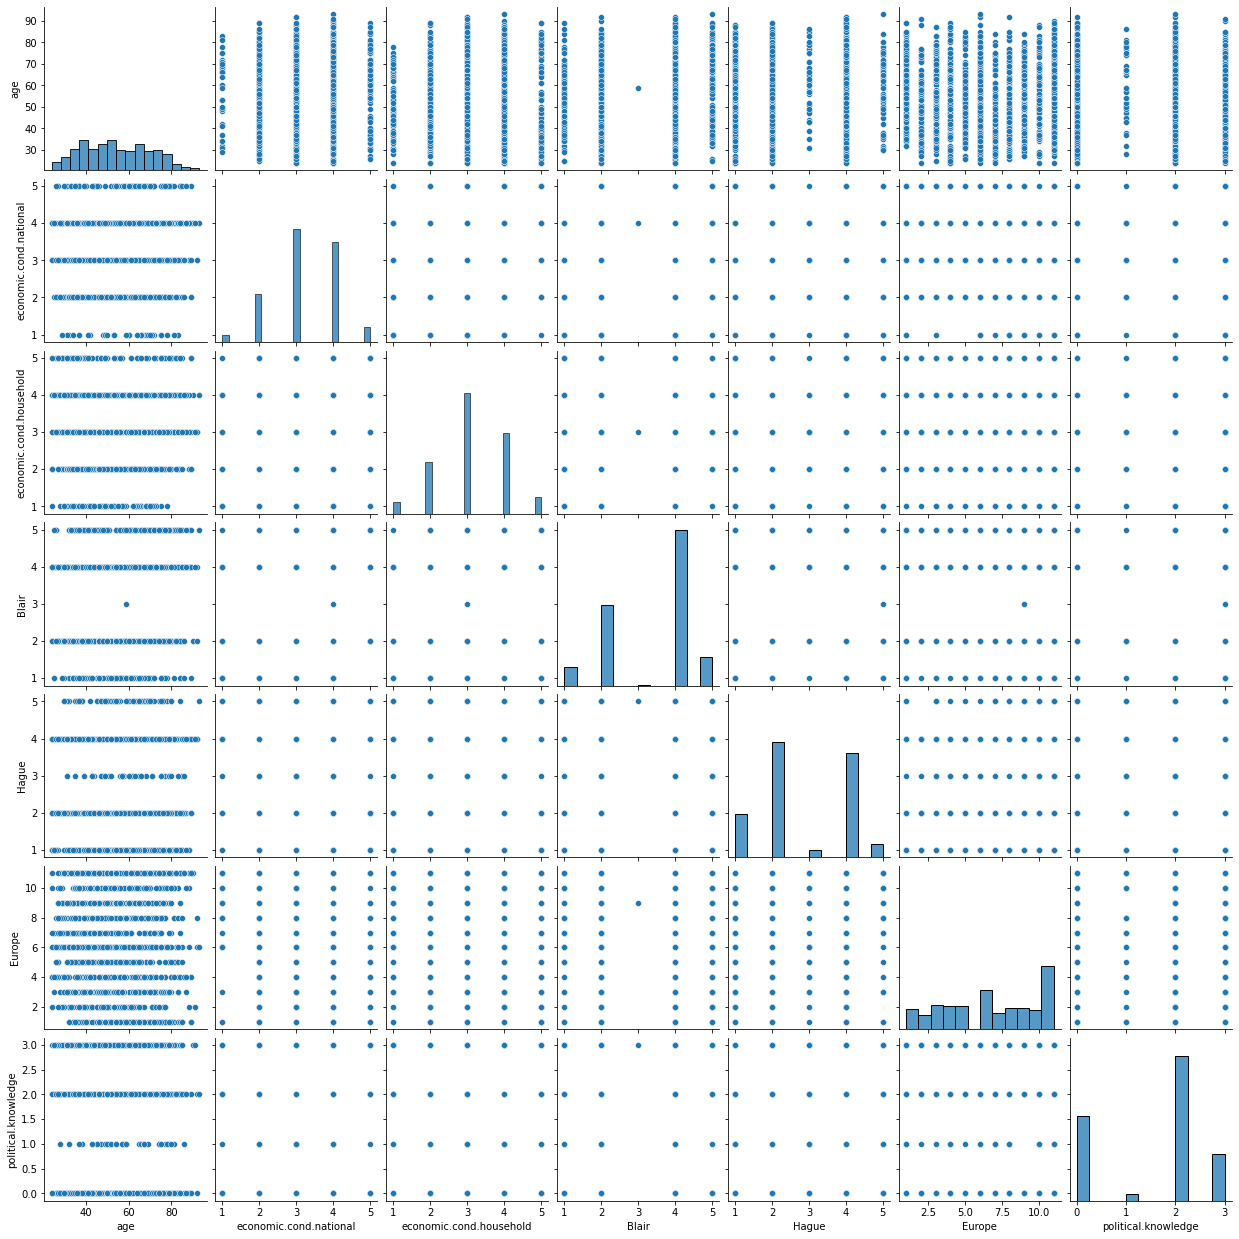

In [16]:
sns.pairplot(data)

<AxesSubplot:>

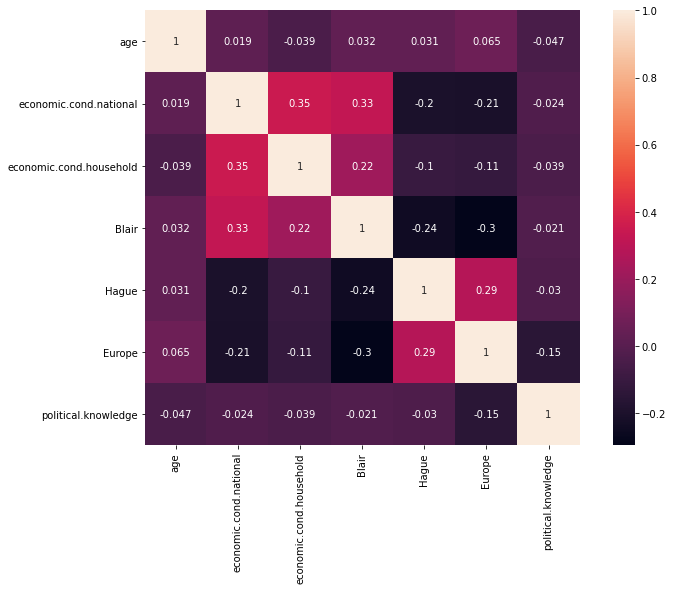

In [17]:
plt.figure(figsize=(12,8))

sns.heatmap(data.corr(),annot=True , square=True)


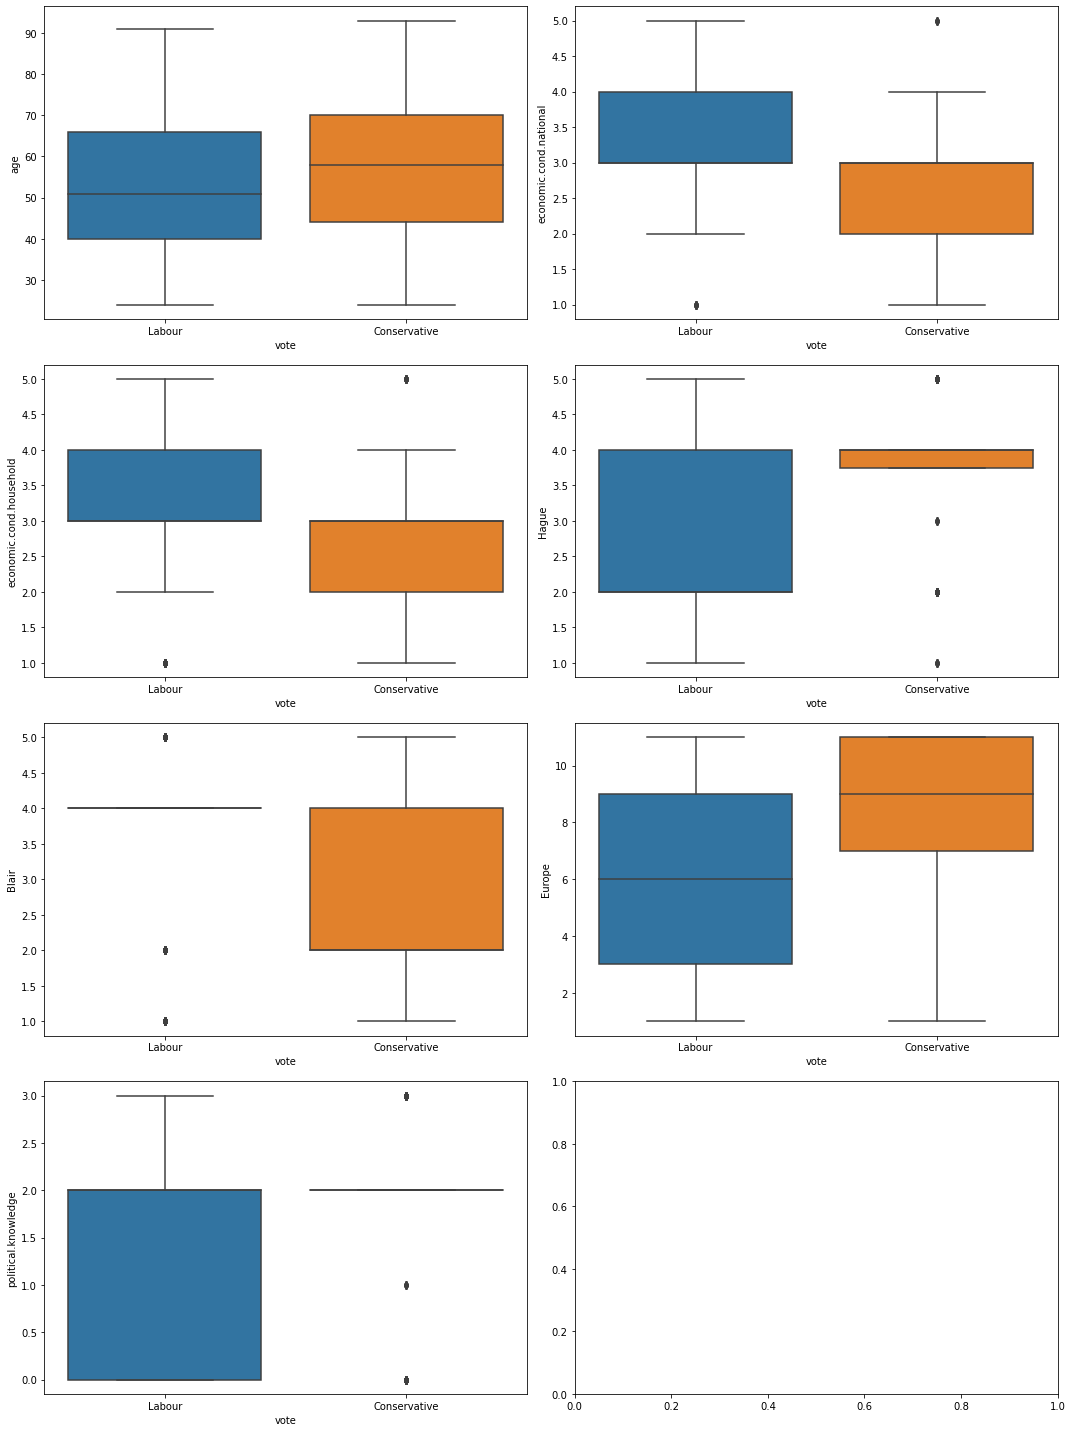

In [18]:
fig,ax = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)

sns.boxplot(x='vote',y='age',data=data, ax=ax[0][0])
sns.boxplot(x='vote',y='economic.cond.national',data=data, ax=ax[0][1])
sns.boxplot(x='vote',y='economic.cond.household',data=data, ax=ax[1][0])
sns.boxplot(x='vote',y='Hague',data=data, ax=ax[1][1])
sns.boxplot(x='vote',y='Blair',data=data, ax=ax[2][0])
sns.boxplot(x='vote',y='Europe',data=data, ax=ax[2][1])
sns.boxplot(x='vote',y='political.knowledge',data=data, ax=ax[3][0])


plt.tight_layout()
plt.show()

In [19]:
def out(col):
    q1,q3= col.quantile([0.25,0.75])
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    return ll,ul

In [20]:
for col in data.columns[1:8]:
    lr,ur= out(data[col])
    lr=max(0,lr)
    a = (data[col].values < lr ).sum()
    b = (data[col].values > ur ).sum()
    c = a+b
    print('Number of outliers in the column', col,  'is', c )

Number of outliers in the column age is 0
Number of outliers in the column economic.cond.national is 37
Number of outliers in the column economic.cond.household is 65
Number of outliers in the column Blair is 0
Number of outliers in the column Hague is 0
Number of outliers in the column Europe is 0
Number of outliers in the column political.knowledge is 0


In [21]:
df=data.copy()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = pd.Categorical(df[col]).codes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 130.1 KB


In [23]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [24]:
X = df.drop(["vote"], axis = 1)
Y = df.vote

In [25]:
from sklearn.preprocessing import StandardScaler
sca= StandardScaler()
X_sca = sca.fit_transform(X)

In [26]:
pd.DataFrame(X_sca, columns = X.columns)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536
...,...,...,...,...,...,...,...,...
1512,0.812836,1.990670,-0.148020,-1.137217,1.014951,1.291625,1.346290,1.067536
1513,1.195085,-1.412613,-1.222408,0.565802,1.014951,0.381971,0.423832,1.067536
1514,-1.098410,-0.278185,-0.148020,1.417312,1.014951,-1.437338,0.423832,1.067536
1515,0.430587,-0.278185,-0.148020,-1.988727,1.014951,1.291625,0.423832,1.067536


In [27]:
X_train, X_test, Y_train, Y_test= train_test_split(X_sca, Y, test_size=0.3, random_state=1)

In [28]:
LR= LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [29]:
LR.score(X_train,Y_train)


0.8312912346842601

In [30]:
LR.score(X_test,Y_test)

0.831140350877193

In [31]:
Y_predicted_train = LR.predict(X_train)
Y_predicted_test = LR.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
CM_train= confusion_matrix(Y_train,Y_predicted_train)
print(CM_train)

[[196 111]
 [ 68 686]]


In [34]:
CM_test= confusion_matrix(Y_test,Y_predicted_test)
print(CM_test)

[[111  42]
 [ 35 268]]


In [35]:
from sklearn.metrics import classification_report
CR= classification_report(Y_test,Y_predicted_test)
print(CR)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



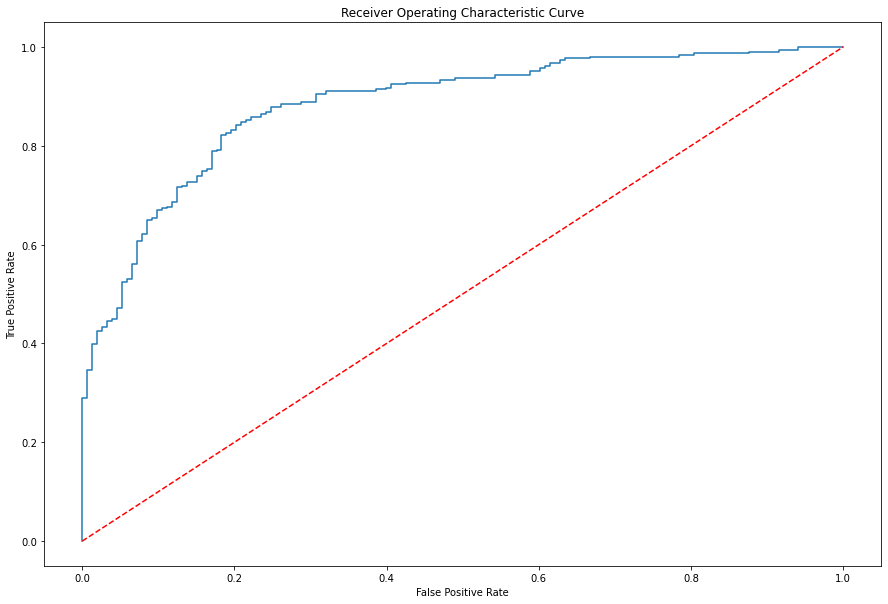

ROC_AUC score is  0.8827412152980003


In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

LR_ROC_AUC = roc_auc_score(Y_test, LR.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, LR.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % LR_ROC_AUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()
print("ROC_AUC score is ",LR_ROC_AUC)

In [38]:
score = []
for k in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train,Y_train)
    score.append(KNN.score(X_train,Y_train))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neighbors', ylabel='Score'>

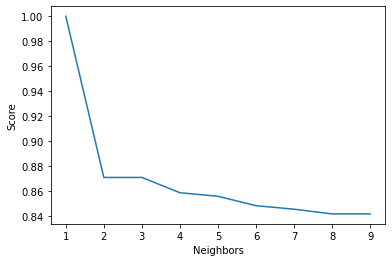

In [39]:
plt.xlabel('Neighbors')
plt.ylabel('Score')
sns.lineplot(range(1,10),score)

In [40]:
KNN5 = KNeighborsClassifier(n_neighbors=5)
KNN5.fit(X_train,Y_train)
Y_predict_train_knn = KNN5.predict(X_train)
Y_predict_test_knn = KNN5.predict(X_test)

In [41]:
KNN5.score(X_train, Y_train)

0.8557964184731386

In [42]:
KNN5.score(X_test, Y_test)

0.8245614035087719

In [43]:
print(confusion_matrix(Y_train,Y_predict_train_knn))

[[218  89]
 [ 64 690]]


In [44]:
print(confusion_matrix(Y_test,Y_predict_test_knn))

[[105  48]
 [ 32 271]]


In [45]:
print(classification_report(Y_train,Y_predict_train_knn))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [46]:
print(classification_report(Y_test,Y_predict_test_knn))

              precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



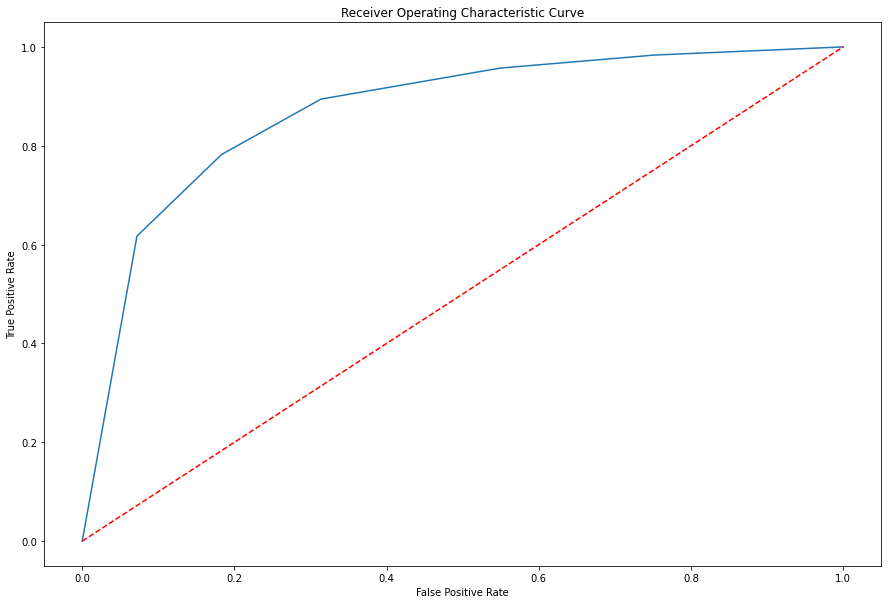

ROC_AUC score is  0.8702409456631937


In [47]:
KNN_ROC_AUC = roc_auc_score(Y_test, KNN5.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, KNN5.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % KNN_ROC_AUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()
print("ROC_AUC score is ",KNN_ROC_AUC)

In [48]:
from sklearn.naive_bayes import GaussianNB
NB= GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

In [49]:
Y_predict_train_nb = NB.predict(X_train)
Y_predict_test_nb = NB.predict(X_test)

In [50]:
NB.score(X_train, Y_train)

0.8350612629594723

In [51]:
NB.score(X_test, Y_test)

0.8223684210526315

In [52]:
print(confusion_matrix(Y_train, Y_predict_train_nb))

[[211  96]
 [ 79 675]]


In [53]:
print(confusion_matrix(Y_test, Y_predict_test_nb))

[[112  41]
 [ 40 263]]


In [54]:
print(classification_report(Y_train, Y_predict_train_nb))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [55]:
print(classification_report(Y_test, Y_predict_test_nb))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



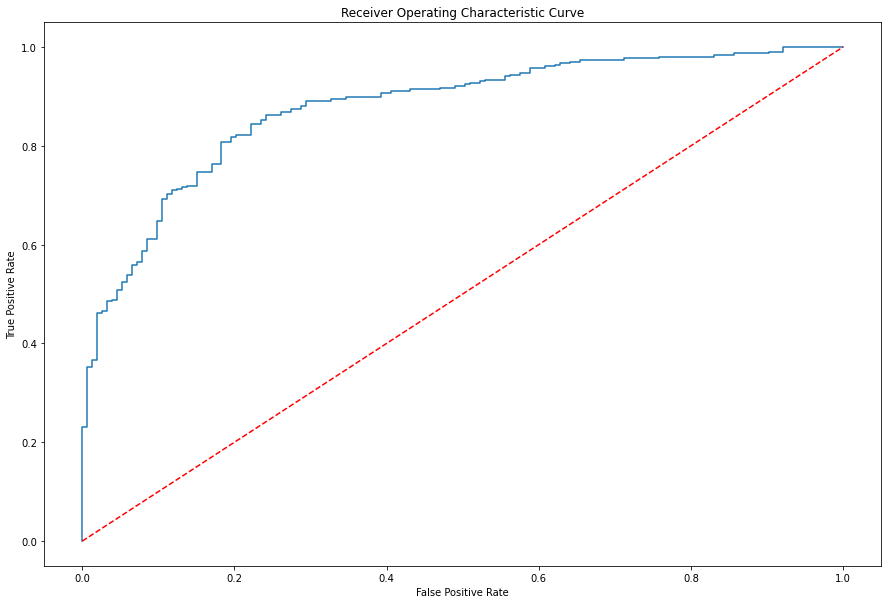

ROC_AUC score is  0.8763562630772882


In [56]:
NB_ROC_AUC = roc_auc_score(Y_test, NB.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, NB.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % NB_ROC_AUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()
print("ROC_AUC score is ",NB_ROC_AUC)

### 1.6

In [57]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [58]:
def grid_search(classifier,param_grid,X_train,Y_train):
    gs= GridSearchCV(classifier,param_grid,n_jobs=-1)
    gs.fit(X_train, Y_train)
    
    classifier= gs.best_estimator_
    y_predict = classifier.predict(X_test)
    print('Best parameters are' ,gs.best_params_)
    print('Testing accuracy = ' , classifier.score(X_test,Y_test)*100,'%')
    print('Mean Cross Validation accuracy for best estimator: ' ,cross_val_score(classifier,X_train,Y_train).mean()*100)
    return gs

In [59]:
param_grid = {'C' : [100, 10, 1, 0.1, 0.01], 'solver' : ['liblinear', 'lbfgs', 'saga']}
gs = grid_search(LR, param_grid, X_train, Y_train)
classifier_LR = gs.best_estimator_

Best parameters are {'C': 0.1, 'solver': 'lbfgs'}
Testing accuracy =  82.23684210526315 %
Mean Cross Validation accuracy for best estimator:  83.13225263530872


In [60]:
param_grid_2 = {'n_neighbors':[i for i in range(1, 15)],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

gs = grid_search(KNN5, param_grid_2, X_train, Y_train)
classifier_KNN = gs.best_estimator_

Best parameters are {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}
Testing accuracy =  82.67543859649122 %
Mean Cross Validation accuracy for best estimator:  82.00106298166358


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
RF = RandomForestClassifier()
param_grid_3 = {'max_depth': [15, 20, 25],
              'min_samples_leaf': [3, 5, 7],
              'min_samples_split': [10, 15, 20],
              'n_estimators': [100, 200, 300, 400]}

gs = grid_search(RF, param_grid_3, X_train, Y_train)
classifier_rf = gs.best_estimator_

Best parameters are {'max_depth': 25, 'min_samples_leaf': 7, 'min_samples_split': 20, 'n_estimators': 300}
Testing accuracy =  82.67543859649122 %
Mean Cross Validation accuracy for best estimator:  83.22570643989724


In [65]:
RF_optimized = RandomForestClassifier(max_depth = 25, min_samples_leaf = 7, min_samples_split = 20, n_estimators = 300)
RF_optimized.fit(X_train,Y_train)
Y_predict_train_rf = RF_optimized.predict(X_train)
Y_predict_test_rf = RF_optimized.predict(X_test)

In [66]:
RF_optimized.score(X_train, Y_train)

0.8633364750235627

In [67]:
RF_optimized.score(X_test, Y_test)

0.8223684210526315

In [68]:
print(confusion_matrix(Y_test, Y_predict_test_rf))

[[ 97  56]
 [ 25 278]]


In [69]:
print(classification_report(Y_test, Y_predict_test_rf))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71       153
           1       0.83      0.92      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



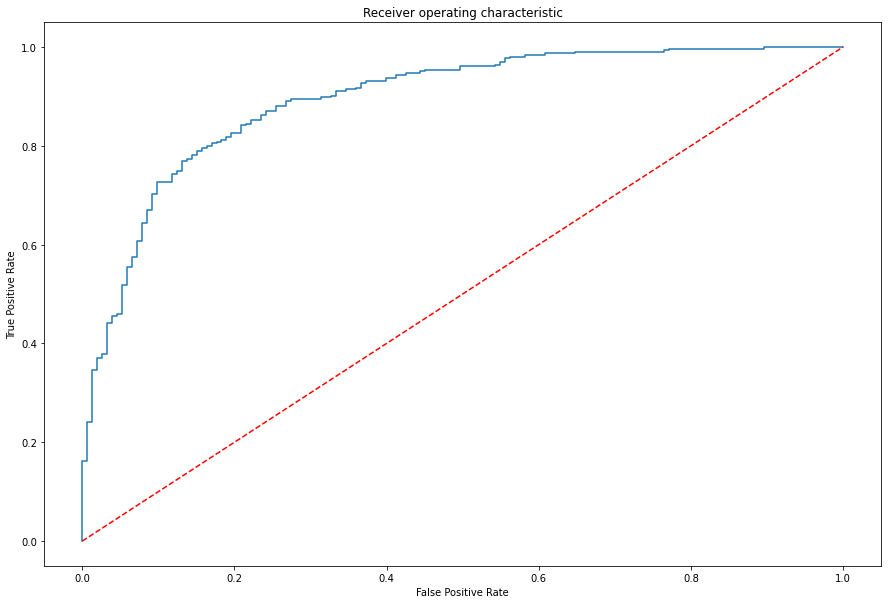

ROC_AUC score is  0.8936991738389525


In [70]:
RF_ROC_AUC = roc_auc_score(Y_test, RF_optimized.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, RF_optimized.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % RF_ROC_AUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",RF_ROC_AUC)

In [71]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [72]:
ADB = AdaBoostClassifier()
ADB.fit(X_train,Y_train)
Y_predict_train_adb = ADB.predict(X_train)
Y_predict_test_adb = ADB.predict(X_test)


In [73]:
ADB.score(X_train, Y_train) 

0.8463713477851084

In [74]:
ADB.score(X_test, Y_test)

0.8135964912280702

In [75]:
print(confusion_matrix(Y_test, Y_predict_test_adb))

[[105  48]
 [ 37 266]]


In [76]:
print(classification_report(Y_test, Y_predict_test_adb))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



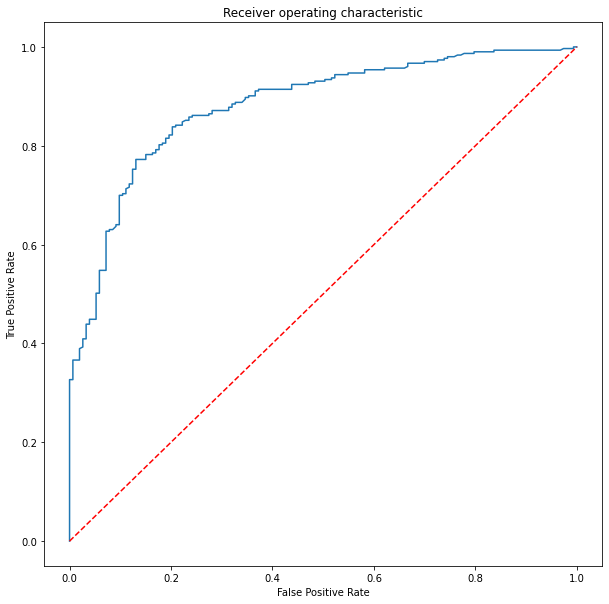

ROC_AUC score is  0.8805517806682629


In [77]:
ADB_ROC_AUC = roc_auc_score(Y_test, ADB.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, ADB.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % ADB_ROC_AUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",ADB_ROC_AUC)

In [78]:
GB = GradientBoostingClassifier()
GB.fit(X_train,Y_train)
Y_predict_train_gb = GB.predict(X_train)
Y_predict_test_gb = GB.predict(X_test)

In [79]:
GB.score(X_train, Y_train) 

0.8925541941564562

In [80]:
GB.score(X_test, Y_test)

0.8377192982456141

In [81]:
print(confusion_matrix(Y_test, Y_predict_test_gb))

[[105  48]
 [ 26 277]]


In [82]:
print(classification_report(Y_test, Y_predict_test_gb))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



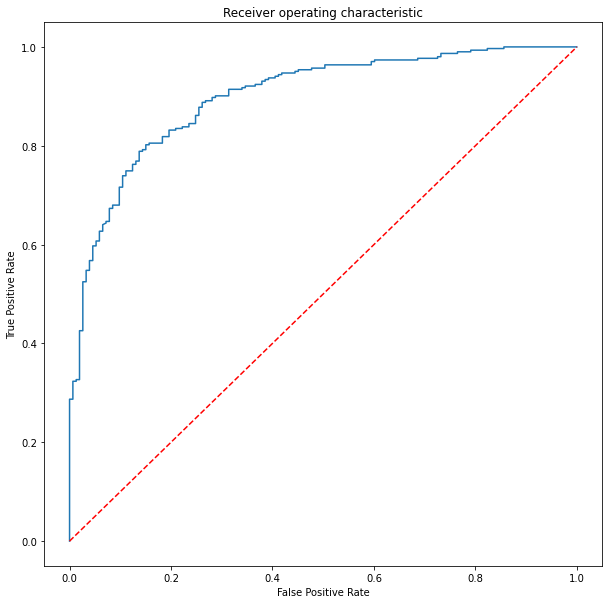

ROC_AUC score is  0.8986280981039281


In [83]:
GB_ROC_AUC = roc_auc_score(Y_test, GB.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, GB.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % GB_ROC_AUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",GB_ROC_AUC)